In [1]:
from fuzzyART_gai import *
from kit_handy import *
from kit_painting import *
import matplotlib.pyplot as plt

In [2]:
alldata, label_true = load_data('iris') #'gaussian2d') #  
pca_painter = PaintPCA(alldata)

Variance explained by first 2 principal components: [0.92138578 0.05142129]


Category 4 is too small


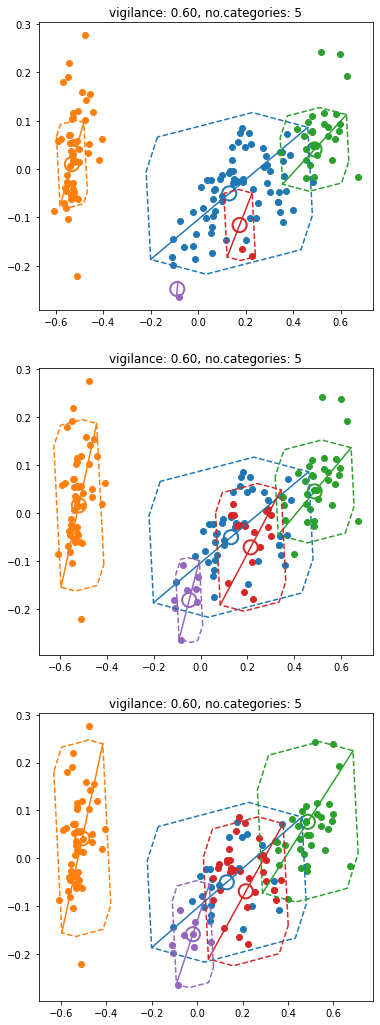

In [3]:
np.random.shuffle(alldata)

no_epoch = 3
fig, axs = plt.subplots(no_epoch, 1,
                        figsize = (6, 6 * no_epoch))
#fig.tight_layout()

# plot true data
#pca_painter.scatter(axs[0], label_true)
#axs[0].set_title("true data")

# init
rho=0.6
net = FuzzyART(alpha=0.5, gamma=.00001, rho=rho, best_match_num=3)

for ax, data in zip(axs, alldata.reshape(no_epoch, -1, 4)):    
    
    # train
    net.train(data, s=-.1) # each epoch, all data is shuffled
    label_predall = net.test(alldata, s=0)
    label_pred = label_predall[:, 0].astype(int)

    # plot
    # pred
    pca_painter.scatter(ax, label_pred, alldata)
    
    # bipole and centre
    pca_painter.tripole(ax, *net.getcat_bipole())
    
    # boundary    
    ax.set_prop_cycle(None)
    pca_painter.boundary(ax, net.getcat_vertex())
    
    # info
    cat_number = net.w.shape[0]
    ax.set_title('vigilance: {:.2f}, no.categories: {}'.format(rho, cat_number))
    
   
# save fig
simname = 'var_rho{:d}'.format(int(rho*100))
dirname = '_simcache'
#savefigure_datetime(fig, simname, dirname)



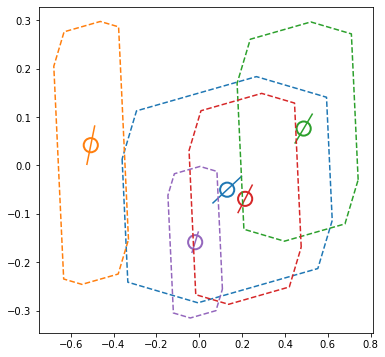

In [17]:
fig, ax = plt.subplots(1, 1,
                        figsize = (6, 6))
# bipole and centre
pca_painter.tripole(ax, *net.getcat_bipole(.4))

# boundary    
ax.set_prop_cycle(None)
pca_painter.boundary(ax, net.getcat_vertex(-.2))